<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/deep-learning-projects-/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN implementation usin numpy 

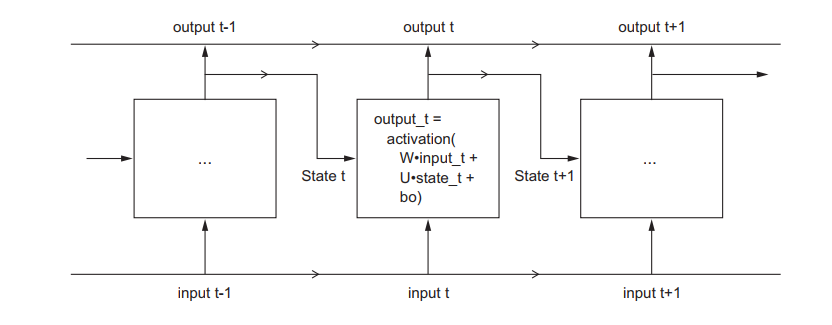


# Pseudocode of simple RNN
```
state_t = 0
for input_t in input_sequence:
  output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
  state_t = output_t
```


In [1]:
import numpy as np 
time_steps = 100 # number of data samples
input_features = 32 # number of features of each input data sample 
output_features = 64 # number of features of each output data sample 
inputs = np.random.random((time_steps,input_features)) #all data samples
#output = np.dot(w,input) + np.dot(u,state_t) + b
state_t = np.zeros((output_features,)) # state_t represent the input to current output from previous output
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_output = []  #where we will store outputs
for input_t in inputs:
  output_t = np.tanh(np.dot(W,input_t) + np.dot(U,state_t) + b)
  state_t = output_t 
  successive_output.append(output_t)



In [2]:
final_output = np.concatenate([successive_output] , axis = 0) # successive_output is list of lists every list represent the output due to one input_sample
# we want to make a np array each row represent the output due to input_t 
# so we use concatenate function 

In [3]:
final_output.shape

(100, 64)

# A recurrent layer in Keras

In [4]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding , Dense

In [5]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))#returns only the output at the last timestep:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))#returns the full state sequence
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


# example on idbm datasets 

In [7]:
from keras.datasets import imdb 
from keras.preprocessing import sequence
max_features = 10000 # number of word consider to be features
max_len = 500 #Cuts off texts after this many words (among the max_features most common words)
batch_size = 32
print("loading data ...")
(input_train , y_train) , (input_test , y_test) = imdb.load_data(num_words=max_features) 

loading data ...
17473536/17464789 [==============================] - 0s 0us/step


In [8]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

25000 train sequences
25000 test sequences


In [9]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train , maxlen=max_len)
input_test = sequence.pad_sequences(input_test , maxlen=max_len)

Pad sequences (samples x time)


In [10]:
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


#Training the model with Embedding and SimpleRNN layers

In [11]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = 'rmsprop',loss='binary_crossentropy',metrics = ['accuracy'])

In [13]:
history = model.fit(input_train , y_train , batch_size=128 , epochs = 2,validation_split=0.2)

Epoch 1/2
157/157 [==============================] - 85s 486ms/step - loss: 0.6653 - accuracy: 0.5870 - val_loss: 0.5785 - val_accuracy: 0.7158
Epoch 2/2
157/157 [==============================] - 75s 477ms/step - loss: 0.4320 - accuracy: 0.8101 - val_loss: 0.3790 - val_accuracy: 0.8410


In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#Plotting results

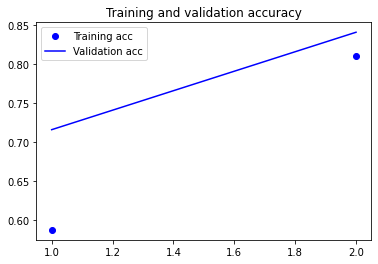

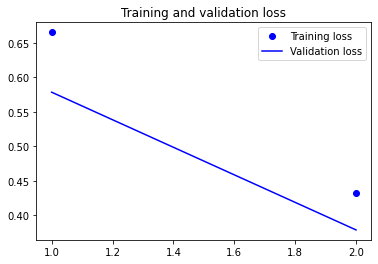

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
model.evaluate(input_test , y_test)

782/782 [==============================] - 29s 37ms/step - loss: 0.3790 - accuracy: 0.8407


[0.37896794080734253, 0.840719997882843]

#LSTM and GRU
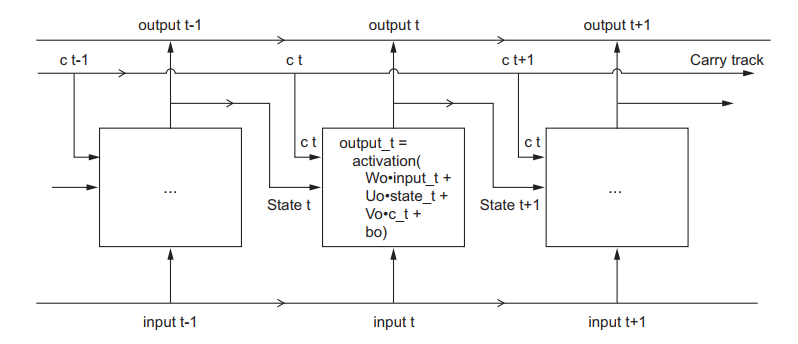

#Pseudocode for LSTM
```
output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)
state_t = output_t-1
i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf) 
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)
c_t+1 = i_t * k_t + c_t * f_t

```

In [17]:
from keras.layers import Embedding , Dense ,LSTM 
model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer = 'rmsprop',loss='binary_crossentropy',metrics = ['accuracy'])

In [28]:
history = model.fit(input_train , y_train , batch_size=128 , epochs = 10,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 3s 21ms/step - loss: 0.0650 - accuracy: 0.9781 - val_loss: 0.4691 - val_accuracy: 0.8746
Epoch 2/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0599 - accuracy: 0.9804 - val_loss: 0.4438 - val_accuracy: 0.8654
Epoch 3/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0566 - accuracy: 0.9818 - val_loss: 0.5306 - val_accuracy: 0.8686
Epoch 4/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0530 - accuracy: 0.9826 - val_loss: 0.4976 - val_accuracy: 0.8548
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0536 - accuracy: 0.9841 - val_loss: 0.4575 - val_accuracy: 0.8584
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.9435 - val_accuracy: 0.7988
Epoch 7/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0489 - accuracy: 0.9853 - val_loss: 0.5027 - val_accuracy: 0.8692

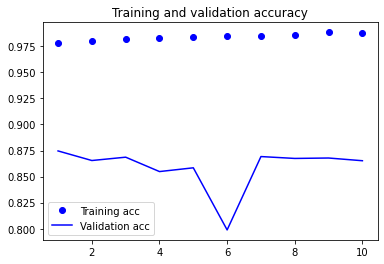

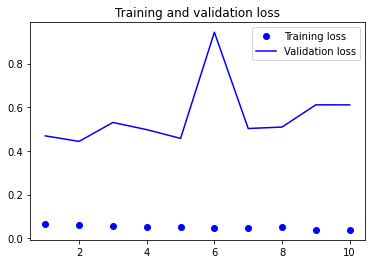

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
model.evaluate(input_test , y_test)

782/782 [==============================] - 6s 8ms/step - loss: 0.6997 - accuracy: 0.8445


[0.6997365355491638, 0.8445199728012085]